In [1]:
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import InputLayer, Dense, Activation
from keras.utils import np_utils
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam # - Work
import numpy as np

In [30]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [31]:
# X_train.shape
# X_test.shape


In [32]:
# print(X_train[0])

# type을 바꿔야하는 이유, 타입이란 뭐임?

# https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=ksg97031&logNo=221302568510

In [33]:
X_train = X_train.reshape(60000, 784)     
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')     
X_test = X_test.astype('float32')     
X_train /= 255    
X_test /= 255


In [34]:
print(Y_train)
Y_train.shape

[5 0 4 ... 5 6 8]


(60000,)

In [35]:
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)     # to_categorical ??? -> One-hot!!!
Y_test = np_utils.to_categorical(Y_test, classes) 

In [36]:
print(Y_train)
Y_train.shape

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


(60000, 10)

In [37]:
input_size = 784 # 입력 갯수
batch_size = 100 # 한번에 학습할 데이터 갯수
epochs = 20 # 학습 반복횟수

In [38]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(Dense(400)) 
model.add(Activation('relu'))     
model.add(Dense(classes))
model.add(Activation('softmax'))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 400)               314000    
                                                                 
 activation_2 (Activation)   (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                4010      
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                                 
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________


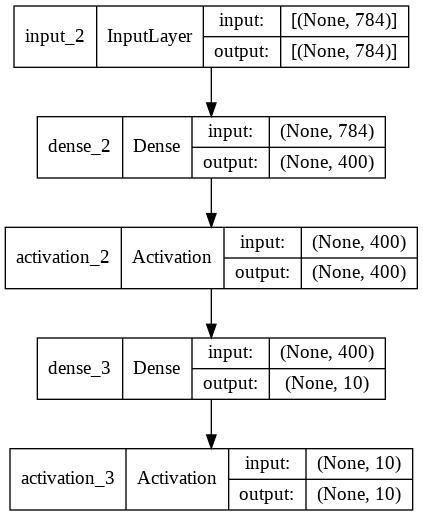

In [41]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [43]:
optimizer = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

# cross entropy, https://ko.wikipedia.org/wiki/교차_엔트로피
#https://3months.tistory.com/436

In [44]:
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
600/600 [==============================] - 4s 4ms/step - loss: 0.2082 - accuracy: 0.9373
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1241 - accuracy: 0.9640
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0995 - accuracy: 0.9712
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0792 - accuracy: 0.9770
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0802 - accuracy: 0.9780
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0742 - accuracy: 0.9803
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0749 - accuracy: 0.9804
Epoch 8/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0656 - accuracy: 0.9831
Epoch 9/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0625 - accuracy: 0.9839
Epoch 10/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0543 - accuracy: 0.9865

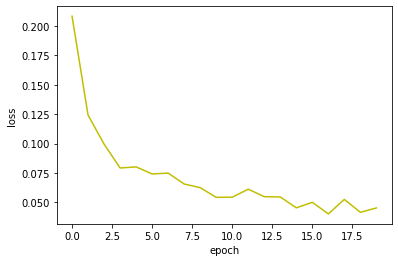

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'y', label='train loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

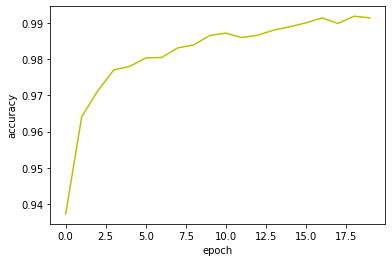

In [46]:
plt.plot(history.history['accuracy'], 'y', label='train acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [54]:
score = model.evaluate(X_test, Y_test, verbose=1) #verbose , https://buillee.tistory.com/143
print('\n''Test accuracy:', score[1]) 

313/313 [==============================] - 1s 3ms/step - loss: 0.2384 - accuracy: 0.9758

Test accuracy: 0.9757999777793884


In [55]:
preds = model.predict(X_test)

In [56]:
y_true = np.argmax(Y_test, axis=1) #argmax? https://driz2le.tistory.com/278
preds = np.argmax(preds, axis=1)

In [57]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

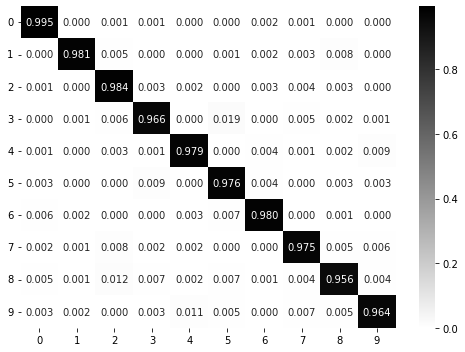

In [58]:
x_lab = [0,1,2,3,4,5,6,7,8,9]
y_lab = [0,1,2,3,4,5,6,7,8,9]

conf_matrix = confusion_matrix(y_true, preds)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] # 갯수가 아닌 비율로 표시하고 싶을 경우 주석 해제
plt.figure(figsize=(7,5)) # 그림의 size 지정
aa = sns.heatmap(conf_matrix, xticklabels = x_lab, yticklabels = y_lab, annot=True, fmt=".3f", cmap=plt.cm.binary)#, vmin = 0.0, vmax = 1.0)
plt.yticks(rotation='horizontal')
plt.tight_layout()

In [59]:
from sklearn.metrics import classification_report

In [60]:
print('Classification Report')
print(classification_report(y_true, preds, digits=4))

Classification Report
              precision    recall  f1-score   support

           0     0.9789    0.9949    0.9868       980
           1     0.9938    0.9815    0.9876      1135
           2     0.9658    0.9845    0.9750      1032
           3     0.9750    0.9663    0.9707      1010
           4     0.9796    0.9786    0.9791       982
           5     0.9571    0.9765    0.9667       892
           6     0.9832    0.9802    0.9817       958
           7     0.9757    0.9747    0.9752      1028
           8     0.9688    0.9559    0.9623       974
           9     0.9769    0.9643    0.9706      1009

    accuracy                         0.9758     10000
   macro avg     0.9755    0.9757    0.9756     10000
weighted avg     0.9759    0.9758    0.9758     10000

